In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [118]:
df=pd.read_csv(r"C:\INNOMATICS RESEARCH LAB\7 ML\Projects\Classification Projects\ride_demand_dataset.csv")
df.head()

date      location  hour  weekday  is_weekend     occasion  \
0  2023-09-21      Ameerpet    10        3       False  Regular Day   
1  2019-09-27      Ameerpet    23        4       False  Regular Day   
2  2021-09-30      Madhapur    11        3       False  Regular Day   
3  2024-12-24      Ameerpet     5        1       False  Regular Day   
4  2024-11-03  Secunderabad    23        6        True  Regular Day   

   temperature  rain_chance  metro_available  is_holiday  ride_demand  
0         30.2            0                1       False         0.36  
1         32.4            0                1       False         0.23  
2         27.3            0                0       False         0.35  
3         35.1            0                1       False         0.38  
4         24.5            0                1        True         0.45

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             15000 non-null  object 
 1   location         15000 non-null  object 
 2   hour             15000 non-null  int64  
 3   weekday          15000 non-null  int64  
 4   is_weekend       15000 non-null  bool   
 5   occasion         15000 non-null  object 
 6   temperature      15000 non-null  float64
 7   rain_chance      15000 non-null  int64  
 8   metro_available  15000 non-null  int64  
 9   is_holiday       15000 non-null  bool   
 10  ride_demand      15000 non-null  float64
dtypes: bool(2), float64(2), int64(4), object(3)
memory usage: 1.1+ MB


In [120]:
df.isnull().sum()

date               0
location           0
hour               0
weekday            0
is_weekend         0
occasion           0
temperature        0
rain_chance        0
metro_available    0
is_holiday         0
ride_demand        0
dtype: int64

In [121]:
df.duplicated().sum()

0

In [122]:
df1=df.copy()

In [123]:
df1['date'] = pd.to_datetime(df1['date'])
df1['year'] = df1['date'].dt.year
df1['month'] = df1['date'].dt.month

In [124]:
df["ride_demand"].describe()

count    15000.000000
mean         0.494798
std          0.225571
min          0.000000
25%          0.320000
50%          0.450000
75%          0.670000
max          1.000000
Name: ride_demand, dtype: float64

In [125]:
def categorize_demand(x):
    if x <= 0.36:
        return 'Low'
    elif x <= 0.58:
        return 'Medium'
    else:
        return 'High'
df['ride_demand'] = df['ride_demand'].apply(categorize_demand)
print(df['ride_demand'].value_counts())

ride_demand
Low       5210
High      5025
Medium    4765
Name: count, dtype: int64


In [126]:
df['is_weekend'] = df['is_weekend'].astype(str)

In [127]:
df['is_holiday'] = df['is_holiday'].astype(str)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             15000 non-null  object 
 1   location         15000 non-null  object 
 2   hour             15000 non-null  int64  
 3   weekday          15000 non-null  int64  
 4   is_weekend       15000 non-null  object 
 5   occasion         15000 non-null  object 
 6   temperature      15000 non-null  float64
 7   rain_chance      15000 non-null  int64  
 8   metro_available  15000 non-null  int64  
 9   is_holiday       15000 non-null  object 
 10  ride_demand      15000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 1.3+ MB


# EDA Non-Visual

In [130]:
# Location with High Rush
rush = df[df["ride_demand"] == "High"]["location"].value_counts().nlargest(1)
rush

location
Kukatpally    741
Name: count, dtype: int64

In [131]:
# Weekday with High Rush
weekday = df[df["ride_demand"] == "High"]["weekday"].value_counts().nlargest(1)
weekday

weekday
5    1991
Name: count, dtype: int64

In [132]:
# Top Hour with High Rush
hour = df[df["ride_demand"] == "High"]["hour"].value_counts().nlargest()
hour

hour
19    325
17    324
18    321
10    319
9     319
Name: count, dtype: int64

In [133]:
# Top Occassions with High Rush
occa = df[(df["ride_demand"] == "High") & (df["occasion"] != "Regular Day")]
occasion = occa["occasion"].value_counts().nlargest()
occasion

occasion
Makar Sankranti    80
Ramzan             77
Holi               77
Diwali             75
New Year           73
Name: count, dtype: int64

In [134]:
# metro affects the rush or not
rush_by_metro = df.groupby("metro_available")["ride_demand"].value_counts()
rush_by_metro

metro_available  ride_demand
0                High            765
                 Low             739
                 Medium          707
1                Low            4471
                 High           4260
                 Medium         4058
Name: count, dtype: int64

# EDA Visual

In [136]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             15000 non-null  datetime64[ns]
 1   location         15000 non-null  object        
 2   hour             15000 non-null  int64         
 3   weekday          15000 non-null  int64         
 4   is_weekend       15000 non-null  bool          
 5   occasion         15000 non-null  object        
 6   temperature      15000 non-null  float64       
 7   rain_chance      15000 non-null  int64         
 8   metro_available  15000 non-null  int64         
 9   is_holiday       15000 non-null  bool          
 10  ride_demand      15000 non-null  float64       
 11  year             15000 non-null  int32         
 12  month            15000 non-null  int32         
dtypes: bool(2), datetime64[ns](1), float64(2), int32(2), int64(4), object(2)
memory usage: 1.2+

In [137]:
trend=df1.groupby('year')['ride_demand'].mean().reset_index()
trend

year  ride_demand
0  2019     0.493127
1  2020     0.499067
2  2021     0.494660
3  2022     0.494056
4  2023     0.493181
5  2024     0.494681

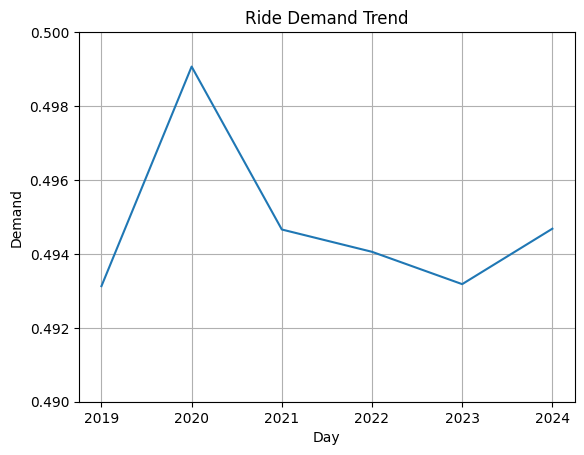

In [138]:
plt.plot(trend["year"], trend["ride_demand"])
plt.title("Ride Demand Trend")
plt.xlabel("Day")
plt.ylabel("Demand")
plt.grid(True)
plt.ylim(0.490, 0.500)
plt.show()

In [139]:
holiday=pd.DataFrame(occasion).reset_index()
holiday

occasion  count
0  Makar Sankranti     80
1           Ramzan     77
2             Holi     77
3           Diwali     75
4         New Year     73

<Axes: xlabel='occasion', ylabel='count'>

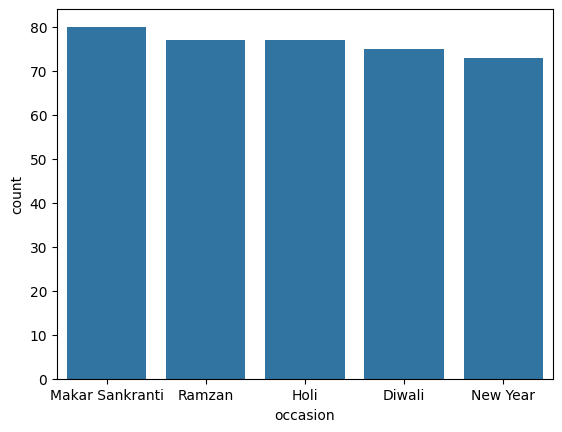

In [140]:
sns.barplot(holiday,x="occasion",y="count")

# Model

In [142]:
y=df["ride_demand"]

In [143]:
X=df.drop(columns=["ride_demand","date"])

In [144]:
X.head()

location  hour  weekday is_weekend     occasion  temperature  \
0      Ameerpet    10        3      False  Regular Day         30.2   
1      Ameerpet    23        4      False  Regular Day         32.4   
2      Madhapur    11        3      False  Regular Day         27.3   
3      Ameerpet     5        1      False  Regular Day         35.1   
4  Secunderabad    23        6       True  Regular Day         24.5   

   rain_chance  metro_available is_holiday  
0            0                1      False  
1            0                1      False  
2            0                0      False  
3            0                1      False  
4            0                1       True

In [145]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   location         15000 non-null  object 
 1   hour             15000 non-null  int64  
 2   weekday          15000 non-null  int64  
 3   is_weekend       15000 non-null  object 
 4   occasion         15000 non-null  object 
 5   temperature      15000 non-null  float64
 6   rain_chance      15000 non-null  int64  
 7   metro_available  15000 non-null  int64  
 8   is_holiday       15000 non-null  object 
dtypes: float64(1), int64(4), object(4)
memory usage: 1.0+ MB


In [146]:
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
# Column Transformer
from sklearn.compose import ColumnTransformer
transformer=ColumnTransformer(transformers=[('t1',StandardScaler(),[5]),("t2",OrdinalEncoder(),[0,1,2,3,4,6,7,8])],remainder="passthrough")
X_train_transform1=transformer.fit_transform(X)
print(X_train_transform1.shape)
X_train_transform2=pd.DataFrame(X_train_transform1,columns=X.columns)

(15000, 9)


In [147]:
from sklearn.feature_selection import mutual_info_classif
# Let's assume you have original column names from X_train
mutual_info=mutual_info_classif(X_train_transform2,y)
mutual_info=pd.Series(mutual_info)
mutual_info.index=X.columns
mutual_info.sort_values(ascending=False)

is_holiday         0.394008
occasion           0.349849
is_weekend         0.346491
rain_chance        0.064697
temperature        0.037075
weekday            0.024898
metro_available    0.004771
location           0.002485
hour               0.000000
dtype: float64

In [148]:
from sklearn.feature_selection import SelectKBest
select_columns=SelectKBest(k=6)
best_features=select_columns.fit_transform(X_train_transform2,y)

In [149]:
selected_features=X.columns[select_columns.get_support()]
print(selected_features)

Index(['weekday', 'is_weekend', 'occasion', 'temperature', 'rain_chance',
       'is_holiday'],
      dtype='object')


In [150]:
y=df["ride_demand"]

In [151]:
X=df.drop(columns=["ride_demand","date"])
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   location         15000 non-null  object 
 1   hour             15000 non-null  int64  
 2   weekday          15000 non-null  int64  
 3   is_weekend       15000 non-null  object 
 4   occasion         15000 non-null  object 
 5   temperature      15000 non-null  float64
 6   rain_chance      15000 non-null  int64  
 7   metro_available  15000 non-null  int64  
 8   is_holiday       15000 non-null  object 
dtypes: float64(1), int64(4), object(4)
memory usage: 1.0+ MB


In [152]:
X.head()

location  hour  weekday is_weekend     occasion  temperature  \
0      Ameerpet    10        3      False  Regular Day         30.2   
1      Ameerpet    23        4      False  Regular Day         32.4   
2      Madhapur    11        3      False  Regular Day         27.3   
3      Ameerpet     5        1      False  Regular Day         35.1   
4  Secunderabad    23        6       True  Regular Day         24.5   

   rain_chance  metro_available is_holiday  
0            0                1      False  
1            0                1      False  
2            0                0      False  
3            0                1      False  
4            0                1       True

In [153]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__C': [0.1, 1, 10],        # Regularization strength
    'classifier__kernel': ['linear', 'rbf', 'poly'],  # Different kernels
    'classifier__gamma': ['scale', 'auto'] # Kernel coefficient
}

grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)


grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

print("Test Accuracy:", grid_search.score(X_test, y_test))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'classifier__C': 0.1, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}
Best Cross-Validation Accuracy: 0.7133333333333334
Test Accuracy: 0.717


In [173]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


# Suppose you know which are categorical and numerical
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Pipeline with preprocessing + SVC
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(C=0.1,gamma='scale',kernel='linear'))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit
pipe.fit(X_train, y_train)

# Evaluate
print("Train Accuracy:", pipe.score(X_train, y_train))
print("Test Accuracy:", pipe.score(X_test, y_test))

Train Accuracy: 0.7133333333333334
Test Accuracy: 0.717


In [175]:
# Make Predictions
y_pred=pipe.predict(X_test)

In [177]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 855   18  136]
 [   0 1023   31]
 [  70  594  273]]
              precision    recall  f1-score   support

        High       0.92      0.85      0.88      1009
         Low       0.63      0.97      0.76      1054
      Medium       0.62      0.29      0.40       937

    accuracy                           0.72      3000
   macro avg       0.72      0.70      0.68      3000
weighted avg       0.72      0.72      0.69      3000



In [179]:
from joblib import dump

dump(model, 'ML_Classifi.joblib')

['ML_Classifi.joblib']

In [181]:
from joblib import load
model= load('ML_Classifi.joblib')

In [183]:
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['hour', 'weekday', 'temperature', 'rain_chance', 'metro_available'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['location', 'is_weekend', 'occasion', 'is_holiday'], dtype='object'))])),
                ('classifier', SVC(kernel='linear'))])

In [185]:
new_rows = pd.DataFrame([{'location':'Ameerpet','hour':10,'weekday':3,'is_weekend':"False",'occasion':'Regular Day','temperature':30.2,'rain_chance':0,'metro_available':1,'is_holiday':"False"}])

predictions = model.predict(new_rows)
print(predictions)

['Low']
